# Predicting Diamond Price with Multivariate Linear Regression

This project is written in Python 3.11.

Project completed on 2023-04-24 by Simona Birutė Ašmonaitė

Regression, in general terms, is the prediction of continuous and numerical variable. It's different from classification, where the model predicts to which class/group the item belongs to.

Common regression algorithms:
* Linear regression
* Polynomial regression
* Lasso & Ridge regression.

<br> More information about classification algorithms can be found here: https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501
<br> Information about regression algorithms can be found here: https://towardsdatascience.com/top-machine-learning-algorithms-for-regression-c67258a2c0ac

### **Aim:**
Given the diamond's characteristics, predict its price.

### **Dataset Description:**
Classic dataset that contains 53941 (including column names) rows and 11 columns:
* unnamed column containing IDs
* **carat:** weight of the diamond (0.2-5.01)
* **cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color:** diamond colour, from J (worst) to D (best)
* **clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)
* **table:** width of top of diamond relative to widest point (43-95)
* **price: price in US dollars (\$326--\$18,823) is our target**
* **x:** length in mm (0-10.74)
* **y:** width in mm (0-58.9)
* **z:** depth in mm (0-31.8)

<br> Source: https://www.kaggle.com/datasets/shivam2503/diamonds

![Diamond Characteristics](https://customjewelry.co.za/wp-content/uploads/2019/02/4Cs.jpg)

### **Contents:**
0. Initialization
1. EDA
2. Outliers
3. Plotting and Correlation
4. Encoding
5. Multivariate Regression with all features
6. Multivariate Regression with highly correlated features
7. Forward Feature Selection
8. Multivariate Linear Regression with best selected features
9. Conclusion

# 0. Initialization

In [73]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector

In [74]:
# code assumes the dataset is in the same folder as the .ipynb file

# loading the dataset from csv file
diamonds = pd.read_csv('diamonds.csv')
# checking the type
type(diamonds)

pandas.core.frame.DataFrame

# 1. EDA and cleaning
Exploratory Data Analysis (EDA) - investigation and familiarization of the data. The goal of EDA is to understand the data, generate first insights & questions. 
For example, we can ask ourselves such questions:
* Are the column names understandable? Are they too long? Are there duplicated names?
* Are there missing values? How best to clean them (if there's alot of missing values in each column and our dataset is small, removing them might not be the best option)?
* What are the value counts?
* Are the data values understandable? Do we need to convert or encode them?

EDA steps:
1. Understanding the dataset, for example: head, tail, shape, info, describe.
2. Cleaning, for example: .isduplicated(), .duplicated().
3. Univariate analysis is the deep dive into the variables of interest, for example: .value_counts(), .describe(), plotting the variables of interest.
4. Analysis of relationships between variables, for example: pair plot, boxplot, heatmap.
5. Modeling or further analysis.

Reference: https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

In [75]:
# preview first 5 rows of data
print(diamonds.head())

# preview last 5 rows of data
print(diamonds.tail())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   

In [76]:
# removing the first unnamed column
diamonds = diamonds.iloc[:, 1:]

# check that the modification worked
print(diamonds)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [77]:
# printing column names using 2 methods
print(diamonds.keys())
print(diamonds.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


In [78]:
# Check the data types of each column and presence of null values
# More info: https://www.codecademy.com/learn/stats-variable-types/modules/stats-variable-types/cheatsheet
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [79]:
# double checking for missing values in columns
diamonds.isnull().sum()
# Similar code, but output is in a table:
# salaries[salaries.isnull().any(axis=1)]

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [80]:
# checking for duplicates
diamonds.duplicated().sum()

146

In [81]:
# shape of salaries: rows, columns
print(f'Shape before duplicate removal: {diamonds.shape}')

# removing duplicates
diamonds.drop_duplicates(inplace = True)
# checking if removal of duplicates was successful
print(f'Number of duplicates after removal: {diamonds.duplicated().sum()}')

# shape of salaries: rows, columns
print(f'Shape after duplicate removal: {diamonds.shape}')

Shape before duplicate removal: (53940, 10)
Number of duplicates after removal: 0
Shape after duplicate removal: (53794, 10)


In [82]:
# number of unique values in each column
diamonds.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [83]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [84]:
# drop null values (aka zeros) in rows
# Note: instead of converting to NaNs and then removing them, its possible to remove them together with outliers

# replace zeros with NaNs
diamonds = diamonds.replace(0, np.nan)

# drop rows with NaNs
diamonds = diamonds.dropna()

# check if it worked
print(diamonds.describe())
print(diamonds.shape)

              carat         depth         table         price             x  \
count  53775.000000  53775.000000  53775.000000  53775.000000  53775.000000   
mean       0.797536     61.748232     57.457806   3931.220288      5.731579   
std        0.473169      1.429639      2.233257   3985.918716      1.118611   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53775.000000  53775.000000  
mean       5.734909      3.539964  
std        1.139451      0.702017  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  


In [85]:
# how many carat samples do we have?
diamonds.value_counts('carat')

carat
0.30    2596
1.01    2238
0.31    2238
0.70    1981
0.32    1827
        ... 
2.77       1
2.71       1
2.70       1
2.67       1
5.01       1
Length: 273, dtype: int64

**Observations and Explanations:**
1. First column was unnamed, which was removed. We have 10 columns left: 9 features and 1 target ('price'). Additionally, column names need explanation (see the start of this project).
2. No null values.
3. 146 duplicates, which were removed. After removal there's 53794 rows.
4. 'cut', 'color', 'clarity' agree with the provided definition counts.
5. Object columns need encoding.
6. We had zeros in x, y, z - replace them with NaNs and dropped those rows.
7. Majority of columns have light right-skewness (carat, table, x, y, z), while price has high right-skewness. Depth has light left-skewness.

**Cheatsheet - Skewness:**
* Median (Q2 or 50%) - means 50% of data is lower/higher than this value.
* Mean/average - average values.
* Mean is more sensitive to outliers than median. If data is simetrical - use mean. If data is skewed - use median.
* Mean is pulled in the direction of the skew:
- **Right-skewed data: mean > median.**
- **Left-skewed data: mean < median.**

Skewned is determined by the positioning of the tail: if the tail trails off on the right side, then it's right-skewed; if the tail trails off on the left side, then it's left-skewed.

Source: DataCamp's "Data Analyst with Python" Track.

# 2. Outliers

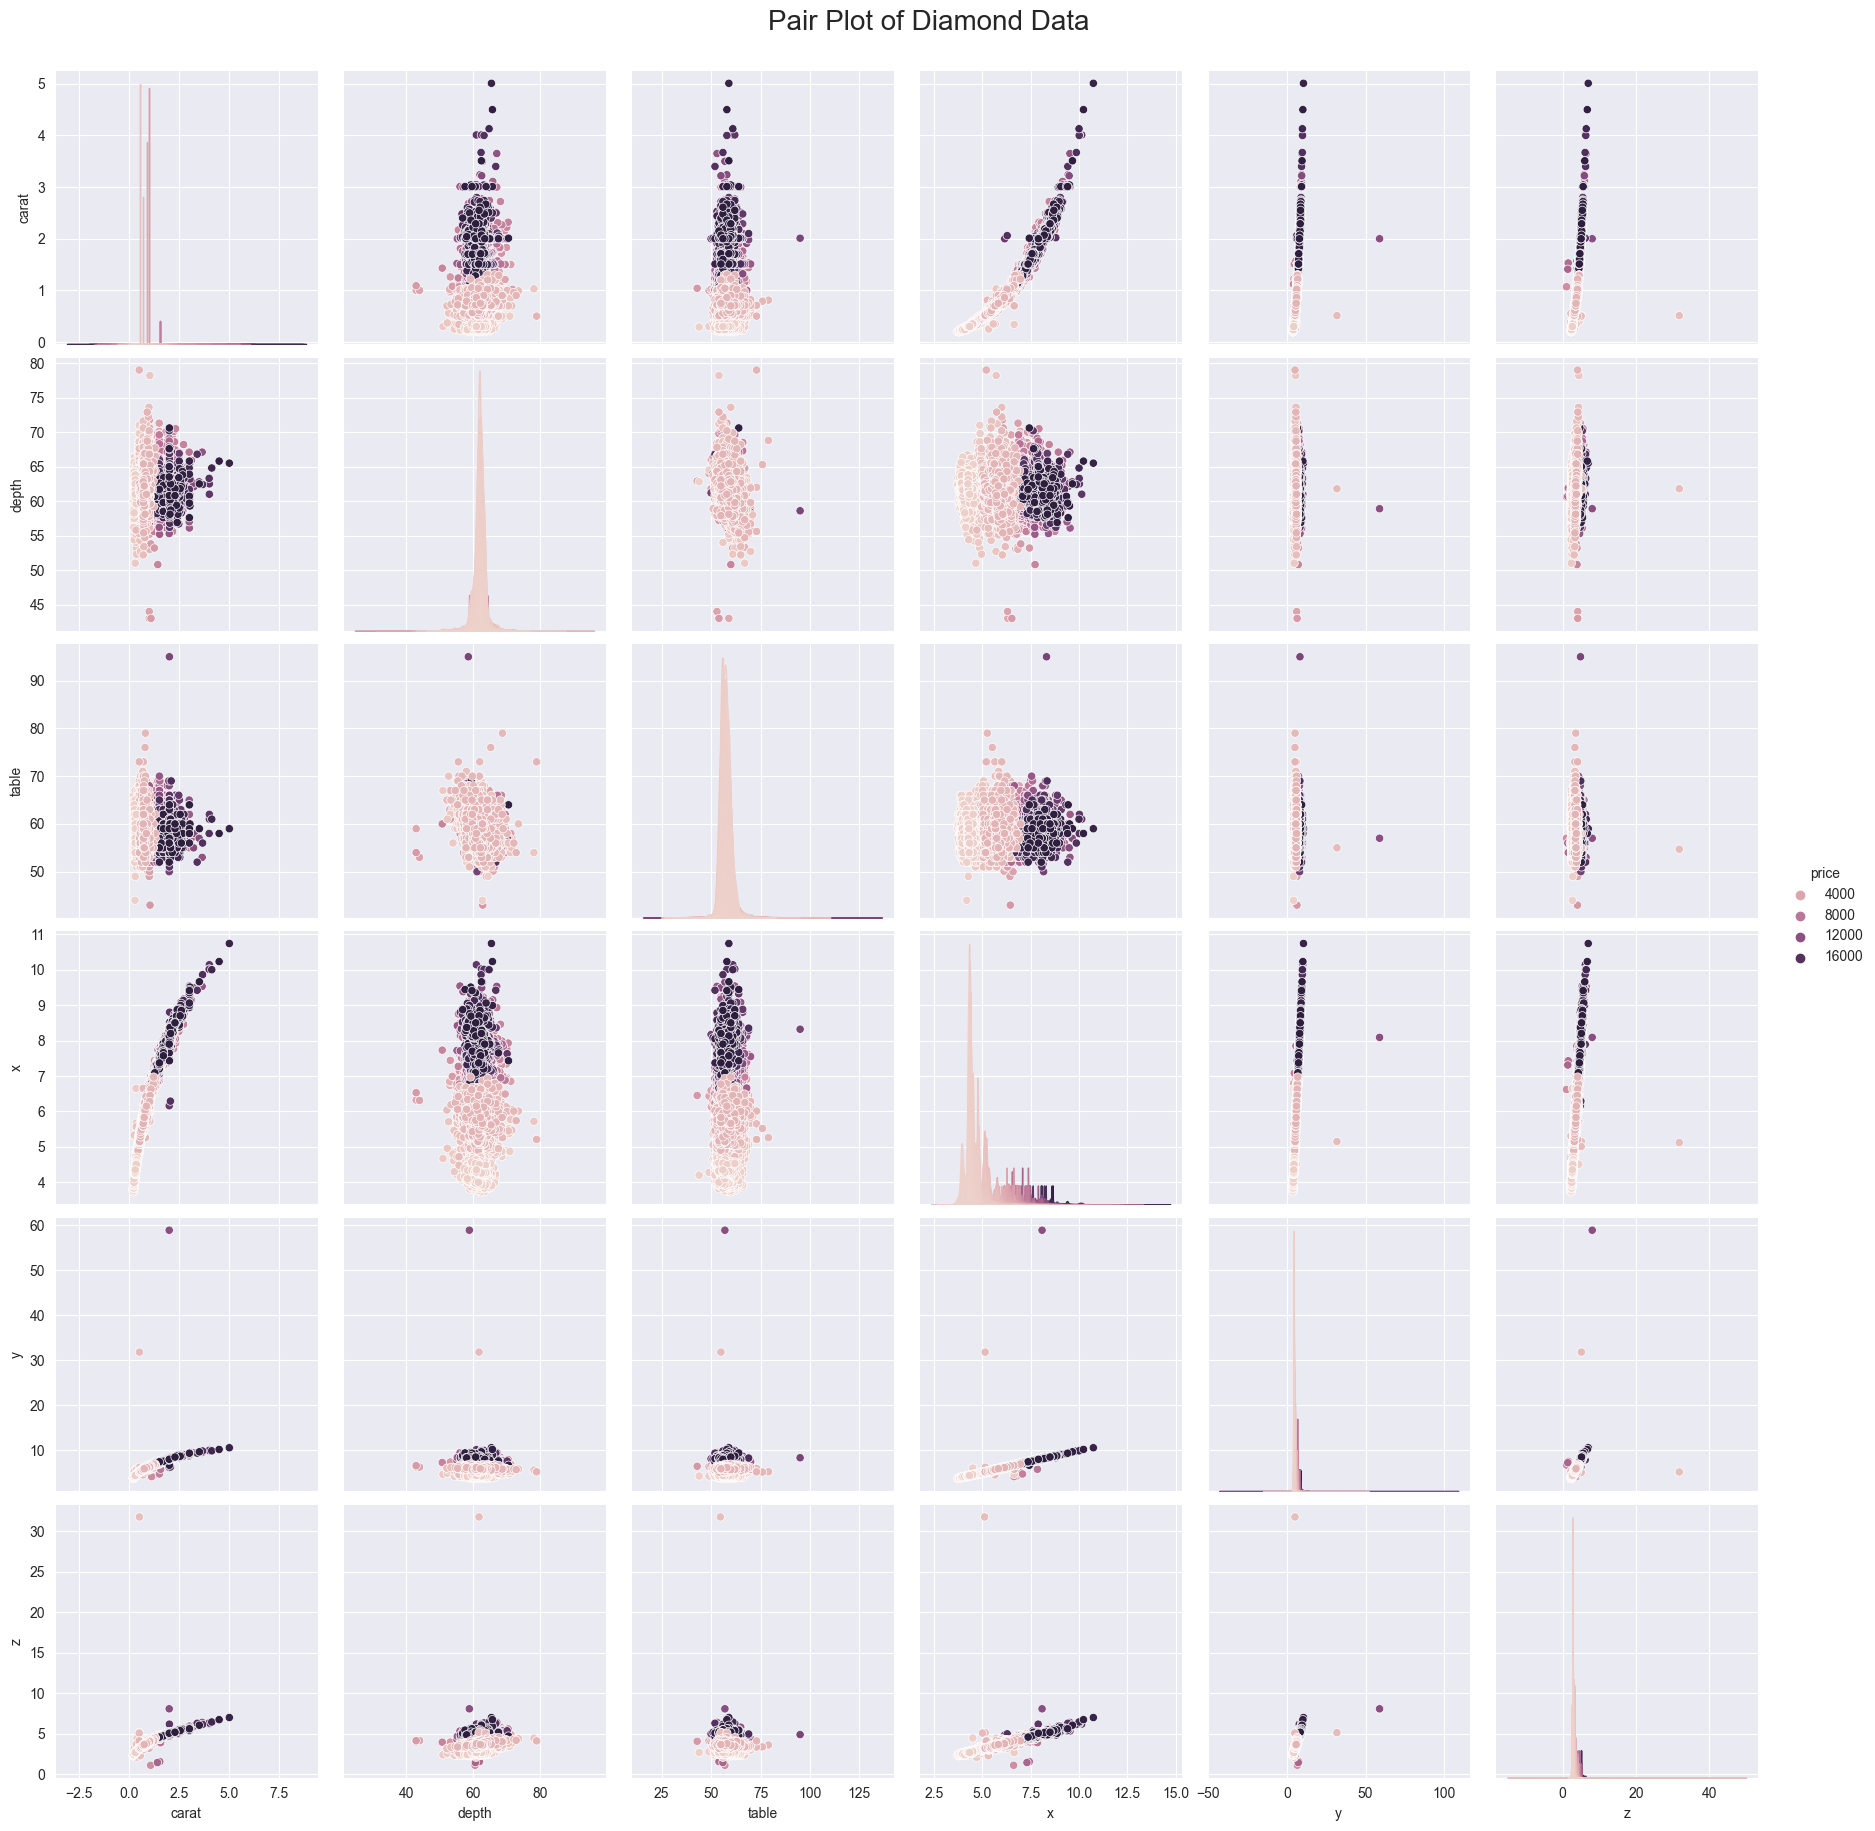

In [86]:
sns.set_style("darkgrid")
# Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE).
# KDE - distribution of observations in a dataset, analogous to a histogram. 
# KDE represents the data using a continuous probability density curve in one or more dimensions.
plot = sns.pairplot(diamonds, hue = "price", height = 3)
plot.fig.suptitle('Pair Plot of Diamond Data', size = 20, y = 1.02) # y = controls title height placement
plt.show() 

# in the below plot, we can see quite a few outliers.

## 2.1 Dealing with outliers
Since our data is lightly skewed, we can use IQR method to deal with outliers. In the next steps, we'll confirm outliers with boxplots and remove them using IQR method. Our main focus will be on columns that had zeros (depth, x, y, z).

Code adapted from: https://www.analyticsvidhya.com/blog/2022/09/dealing-with-outliers-using-the-iqr-method/

### Dealing with 'depth' outliers

<AxesSubplot: >

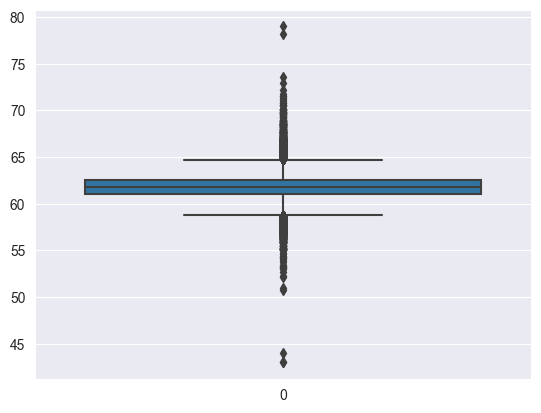

In [87]:
# visualizing outliers with boxplot
sns.boxplot(data = diamonds['depth'])

In [88]:
# calculating quartile range and IQR
Q1_depth = diamonds['depth'].quantile(0.25)
Q3_depth = diamonds['depth'].quantile(0.75)
IQR_depth = Q3_depth - Q1_depth

# calculating upper and lower limit
lower_limit_depth = Q1_depth - 1.5 * IQR_depth
upper_limit_depth = Q3_depth + 1.5 * IQR_depth
print(f'Lower limit is: {lower_limit_depth}')
print(f'Upper limit is: {upper_limit_depth}')

# filtering to see the outliers
# diamonds[diamonds['depth'] > upper_limit_depth]

# how many outliers?
# double quotes are needed to avoid syntax error
print(f"Number of outliers in the upper limit: {diamonds[diamonds['depth'] > upper_limit_depth].count()}")
print(f"Number of outliers in the lower limit: {diamonds[diamonds['depth'] < lower_limit_depth].count()}")

Lower limit is: 58.75
Upper limit is: 64.75
Number of outliers in the upper limit: carat      1027
cut        1027
color      1027
clarity    1027
depth      1027
table      1027
price      1027
x          1027
y          1027
z          1027
dtype: int64
Number of outliers in the lower limit: carat      1496
cut        1496
color      1496
clarity    1496
depth      1496
table      1496
price      1496
x          1496
y          1496
z          1496
dtype: int64


In [89]:
# shape before outlier removal
print(f'Data before removing outliers: {diamonds.shape}')

# removing outliers
diamonds_clean = diamonds[(diamonds['depth'] >= lower_limit_depth) & (diamonds['depth'] <= upper_limit_depth)]

# shape after outlier removal
print(f'Data after removing outliers: {diamonds_clean.shape}')

Data before removing outliers: (53775, 10)
Data after removing outliers: (51252, 10)


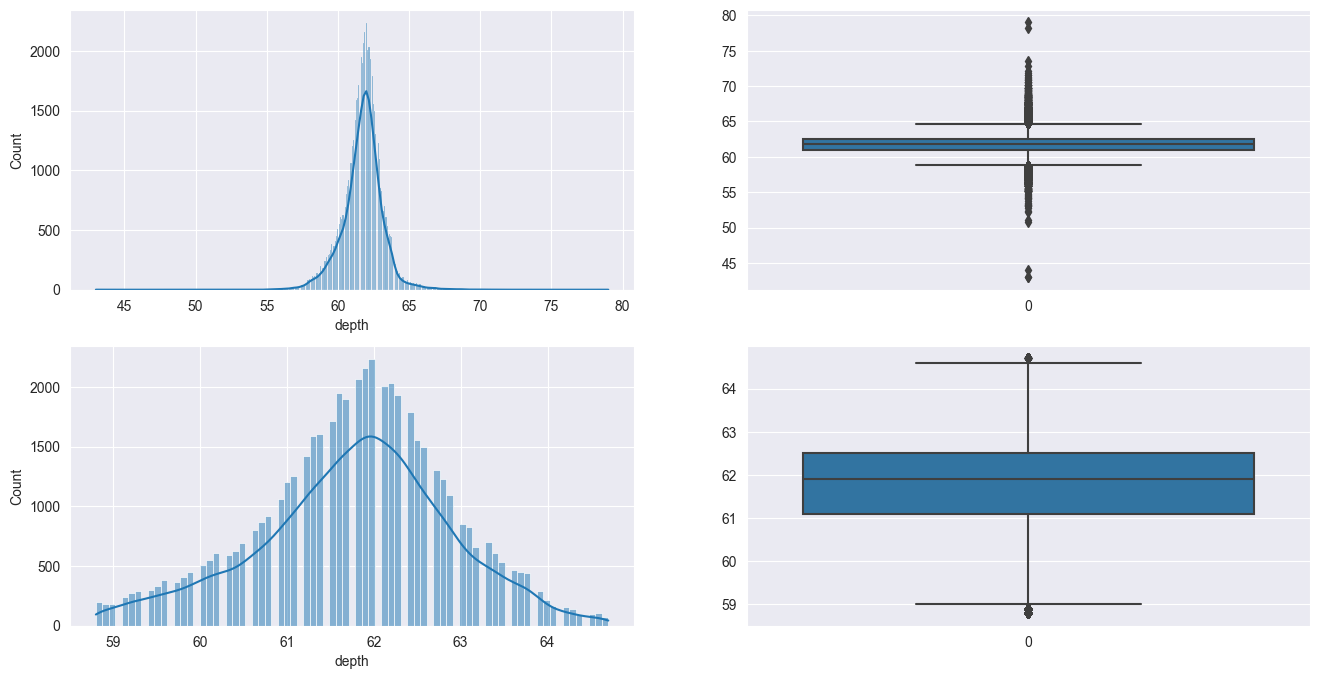

In [90]:
# comparison before and after outlier removal
plt.figure(figsize = (16, 8))
plt.subplot(2, 2, 1)
sns.histplot(diamonds['depth'], kde = True)

plt.subplot(2, 2, 2)
sns.boxplot(data = diamonds['depth'])

plt.subplot(2, 2, 3)
sns.histplot(diamonds_clean['depth'], kde = True)

plt.subplot(2, 2, 4)
sns.boxplot(data = diamonds_clean['depth'])

plt.show()

In [91]:
# the comparison plot after looks much better! Let's assign it to the original diamonds data
diamonds = diamonds[(diamonds['depth'] >= lower_limit_depth) & (diamonds['depth'] <= upper_limit_depth)]
diamonds.shape

(51252, 10)

### Dealing with 'x' outliers

<AxesSubplot: >

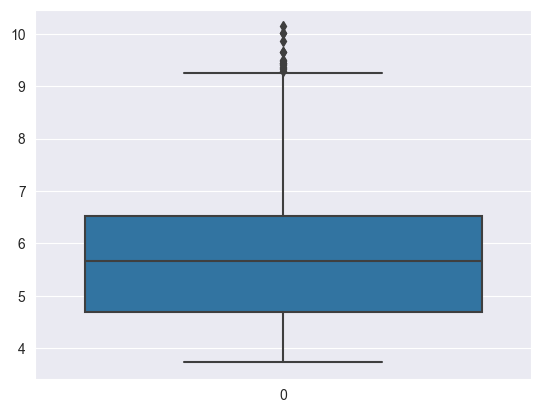

In [92]:
# visualizing outliers with boxplot
sns.boxplot(data = diamonds['x'])

In [93]:
# calculating quartile range and IQR
Q1_x = diamonds['x'].quantile(0.25)
Q3_x = diamonds['x'].quantile(0.75)
IQR_x = Q3_x - Q1_x

# calculating upper and lower limit
lower_limit_x = Q1_x - 1.5 * IQR_x
upper_limit_x = Q3_x + 1.5 * IQR_x
print(f'Lower limit is: {lower_limit_x}')
print(f'Upper limit is: {upper_limit_x}')

# filtering to see the outliers
# diamonds[diamonds['x'] > upper_limit_x]

# how many outliers?
# double quotes are needed to avoid syntax error
print(f"Number of outliers in the upper limit: {diamonds[diamonds['x'] > upper_limit_x].count()}")
print(f"Number of outliers in the lower limit: {diamonds[diamonds['x'] < lower_limit_x].count()}")

Lower limit is: 1.9300000000000006
Upper limit is: 9.29
Number of outliers in the upper limit: carat      16
cut        16
color      16
clarity    16
depth      16
table      16
price      16
x          16
y          16
z          16
dtype: int64
Number of outliers in the lower limit: carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [94]:
# shape before outlier removal
print(f'Data before removing outliers: {diamonds.shape}')

# removing outliers
diamonds_clean = diamonds[(diamonds['x'] >= lower_limit_x) & (diamonds['x'] <= upper_limit_x)]

# shape after outlier removal
print(f'Data after removing outliers: {diamonds_clean.shape}')

Data before removing outliers: (51252, 10)
Data after removing outliers: (51236, 10)


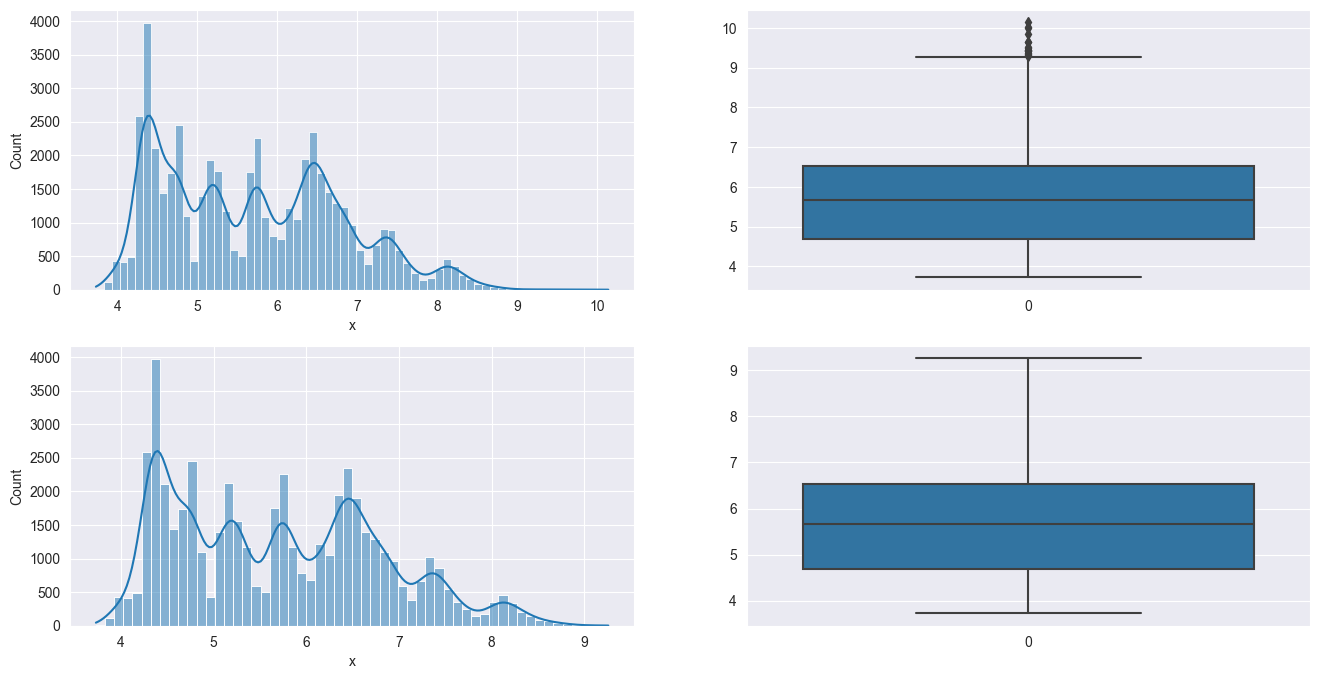

In [95]:
# comparison before and after outlier removal
plt.figure(figsize = (16, 8))
plt.subplot(2, 2, 1)
sns.histplot(diamonds['x'], kde = True)

plt.subplot(2, 2, 2)
sns.boxplot(data = diamonds['x'])

plt.subplot(2, 2, 3)
sns.histplot(diamonds_clean['x'], kde = True)

plt.subplot(2, 2, 4)
sns.boxplot(data = diamonds_clean['x'])

plt.show()

In [96]:
# the comparison plot after looks much better! Let's assign it to the original diamonds data
diamonds = diamonds[(diamonds['x'] >= lower_limit_x) & (diamonds['x'] <= upper_limit_x)]
diamonds.shape

(51236, 10)

### Dealing with 'y' outliers

<AxesSubplot: >

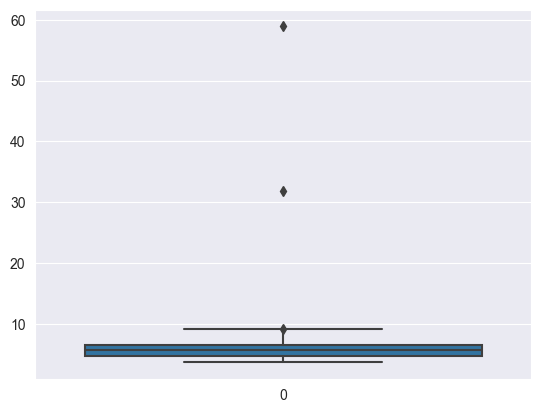

In [97]:
# visualizing outliers with boxplot
sns.boxplot(data = diamonds['y'])

In [98]:
# calculating quartile range and IQR
Q1_y = diamonds['y'].quantile(0.25)
Q3_y = diamonds['y'].quantile(0.75)
IQR_y = Q3_y - Q1_y

# calculating upper and lower limit
lower_limit_y = Q1_y - 1.5 * IQR_y
upper_limit_y = Q3_y + 1.5 * IQR_y
print(f'Lower limit is: {lower_limit_y}')
print(f'Upper limit is: {upper_limit_y}')

# filtering to see the outliers
# diamonds[diamonds['y'] > upper_limit_y]

# how many outliers?
# double quotes are needed to avoid syntax error
print(f"Number of outliers in the upper limit: {diamonds[diamonds['y'] > upper_limit_y].count()}")
print(f"Number of outliers in the lower limit: {diamonds[diamonds['y'] < lower_limit_y].count()}")

Lower limit is: 1.970000000000001
Upper limit is: 9.249999999999998
Number of outliers in the upper limit: carat      3
cut        3
color      3
clarity    3
depth      3
table      3
price      3
x          3
y          3
z          3
dtype: int64
Number of outliers in the lower limit: carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [99]:
# shape before outlier removal
print(f'Data before removing outliers: {diamonds.shape}')

# removing outliers
diamonds_clean = diamonds[(diamonds['y'] >= lower_limit_y) & (diamonds['y'] <= upper_limit_y)]

# shape after outlier removal
print(f'Data after removing outliers: {diamonds_clean.shape}')

Data before removing outliers: (51236, 10)
Data after removing outliers: (51233, 10)


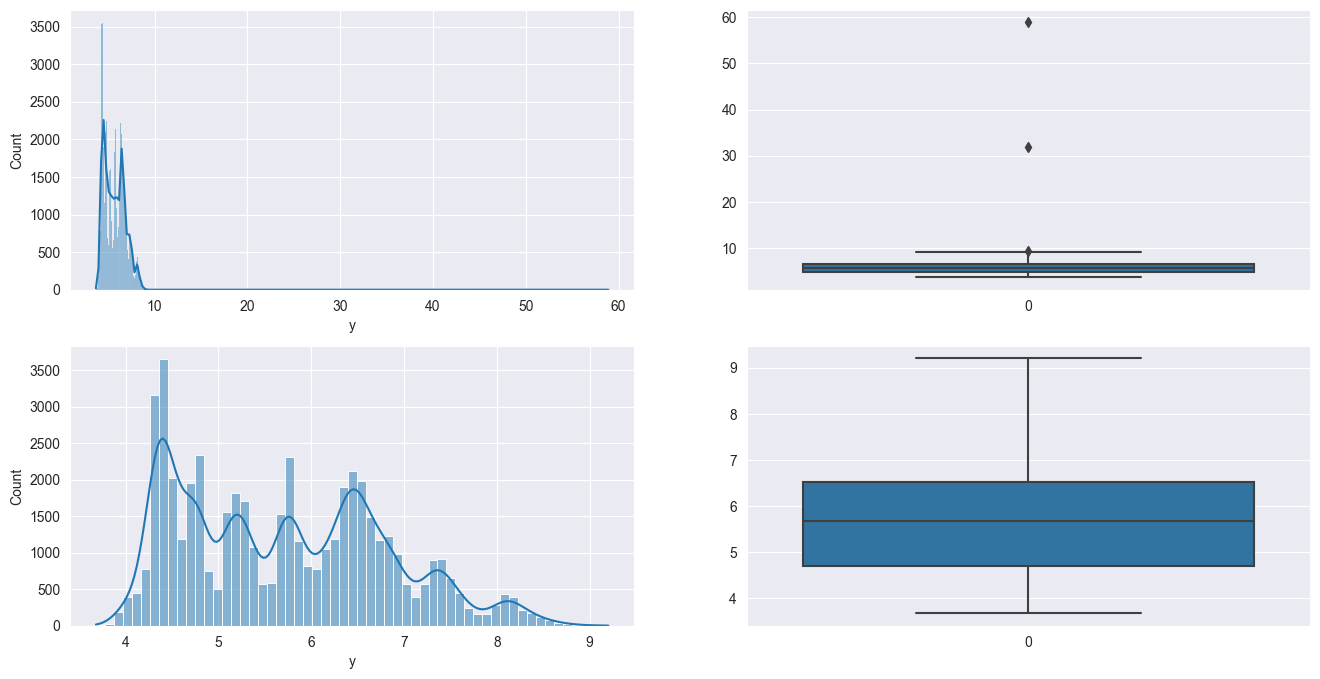

In [100]:
# comparison before and after outlier removal
plt.figure(figsize = (16, 8))
plt.subplot(2, 2, 1)
sns.histplot(diamonds['y'], kde = True)

plt.subplot(2, 2, 2)
sns.boxplot(data = diamonds['y'])

plt.subplot(2, 2, 3)
sns.histplot(diamonds_clean['y'], kde = True)

plt.subplot(2, 2, 4)
sns.boxplot(data = diamonds_clean['y'])

plt.show()

In [101]:
# the comparison plot after looks much better! Let's assign it to the original diamonds data
diamonds = diamonds[(diamonds['y'] >= lower_limit_y) & (diamonds['y'] <= upper_limit_y)]
diamonds.shape

(51233, 10)

### Dealing with 'z' outliers

<AxesSubplot: >

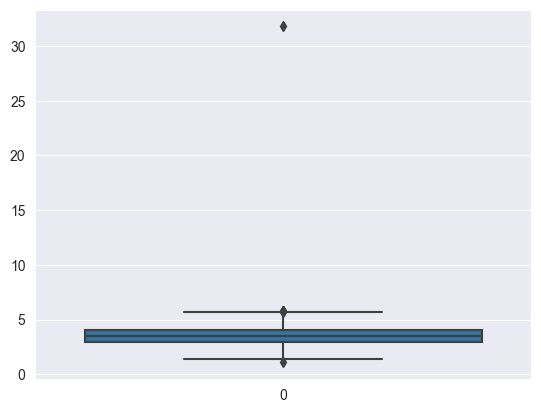

In [102]:
# visualizing outliers with boxplot
sns.boxplot(data = diamonds['z'])

In [103]:
# calculating quartile range and IQR
Q1_z = diamonds['z'].quantile(0.25)
Q3_z = diamonds['z'].quantile(0.75)
IQR_z = Q3_z - Q1_z

# calculating upper and lower limit
lower_limit_z = Q1_z - 1.5 * IQR_z
upper_limit_z = Q3_z + 1.5 * IQR_z
print(f'Lower limit is: {lower_limit_z}')
print(f'Upper limit is: {upper_limit_z}')

# filtering to see the outliers
# diamonds[diamonds['z'] > upper_limit_z]

# how many outliers?
# double quotes are needed to avoid syntax error
print(f"Number of outliers in the upper limit: {diamonds[diamonds['z'] > upper_limit_z].count()}")
print(f"Number of outliers in the lower limit: {diamonds[diamonds['z'] < lower_limit_z].count()}")

Lower limit is: 1.2049999999999994
Upper limit is: 5.7250000000000005
Number of outliers in the upper limit: carat      6
cut        6
color      6
clarity    6
depth      6
table      6
price      6
x          6
y          6
z          6
dtype: int64
Number of outliers in the lower limit: carat      1
cut        1
color      1
clarity    1
depth      1
table      1
price      1
x          1
y          1
z          1
dtype: int64


In [104]:
# shape before outlier removal
print(f'Data before removing outliers: {diamonds.shape}')

# removing outliers
diamonds_clean = diamonds[(diamonds['z'] >= lower_limit_z) & (diamonds['z'] <= upper_limit_z)]

# shape after outlier removal
print(f'Data after removing outliers: {diamonds_clean.shape}')

Data before removing outliers: (51233, 10)
Data after removing outliers: (51226, 10)


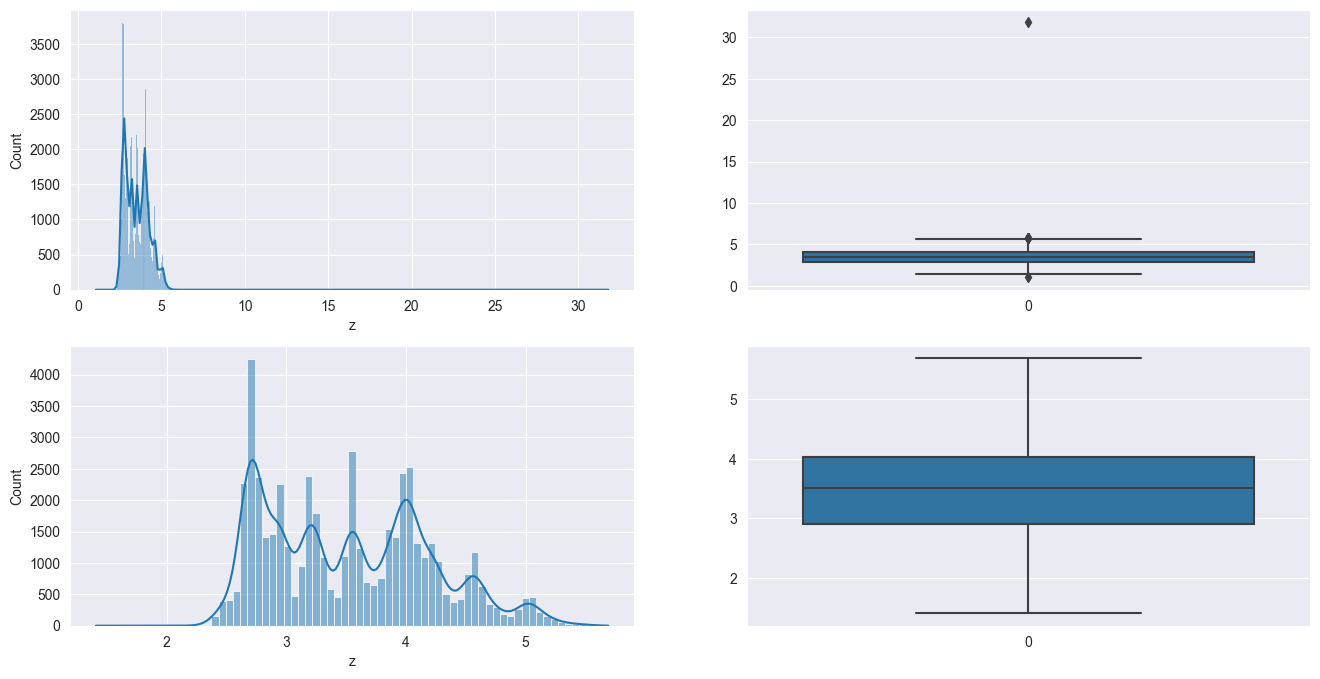

In [105]:
# comparison before and after outlier removal
plt.figure(figsize = (16, 8))
plt.subplot(2, 2, 1)
sns.histplot(diamonds['z'], kde = True)

plt.subplot(2, 2, 2)
sns.boxplot(data = diamonds['z'])

plt.subplot(2, 2, 3)
sns.histplot(diamonds_clean['z'], kde = True)

plt.subplot(2, 2, 4)
sns.boxplot(data = diamonds_clean['z'])

plt.show()

In [106]:
# the comparison plot after looks much better! Let's assign it to the original diamonds data
diamonds = diamonds[(diamonds['z'] >= lower_limit_z) & (diamonds['z'] <= upper_limit_z)]
diamonds.shape

(51226, 10)

### Dealing with 'table' outliers

<AxesSubplot: >

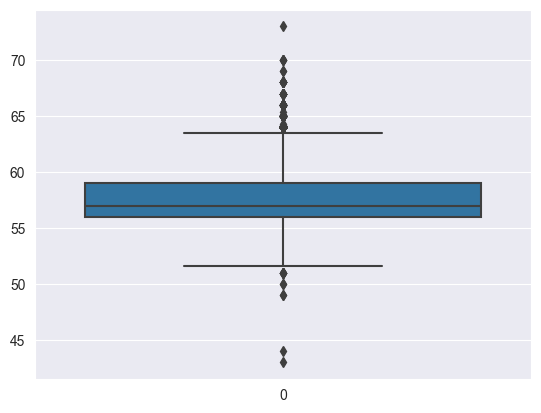

In [107]:
# visualizing outliers with boxplot
sns.boxplot(data = diamonds['table'])

In [108]:
# calculating quartile range and IQR
Q1_table = diamonds['table'].quantile(0.25)
Q3_table = diamonds['table'].quantile(0.75)
IQR_table = Q3_table - Q1_table

# calculating upper and lower limit
lower_limit_table = Q1_table - 1.5 * IQR_table
upper_limit_table = Q3_table + 1.5 * IQR_table
print(f'Lower limit is: {lower_limit_table}')
print(f'Upper limit is: {upper_limit_table}')

# filtering to see the outliers
# diamonds[diamonds['table'] > upper_limit_table]

# how many outliers?
# double quotes are needed to avoid syntax error
print(f"Number of outliers in the upper limit: {diamonds[diamonds['table'] > upper_limit_table].count()}")
print(f"Number of outliers in the lower limit: {diamonds[diamonds['table'] < lower_limit_table].count()}")

Lower limit is: 51.5
Upper limit is: 63.5
Number of outliers in the upper limit: carat      372
cut        372
color      372
clarity    372
depth      372
table      372
price      372
x          372
y          372
z          372
dtype: int64
Number of outliers in the lower limit: carat      12
cut        12
color      12
clarity    12
depth      12
table      12
price      12
x          12
y          12
z          12
dtype: int64


In [109]:
# shape before outlier removal
print(f'Data before removing outliers: {diamonds.shape}')

# removing outliers
diamonds_clean = diamonds[(diamonds['table'] >= lower_limit_table) & (diamonds['table'] <= upper_limit_table)]

# shape after outlier removal
print(f'Data after removing outliers: {diamonds_clean.shape}')

Data before removing outliers: (51226, 10)
Data after removing outliers: (50842, 10)


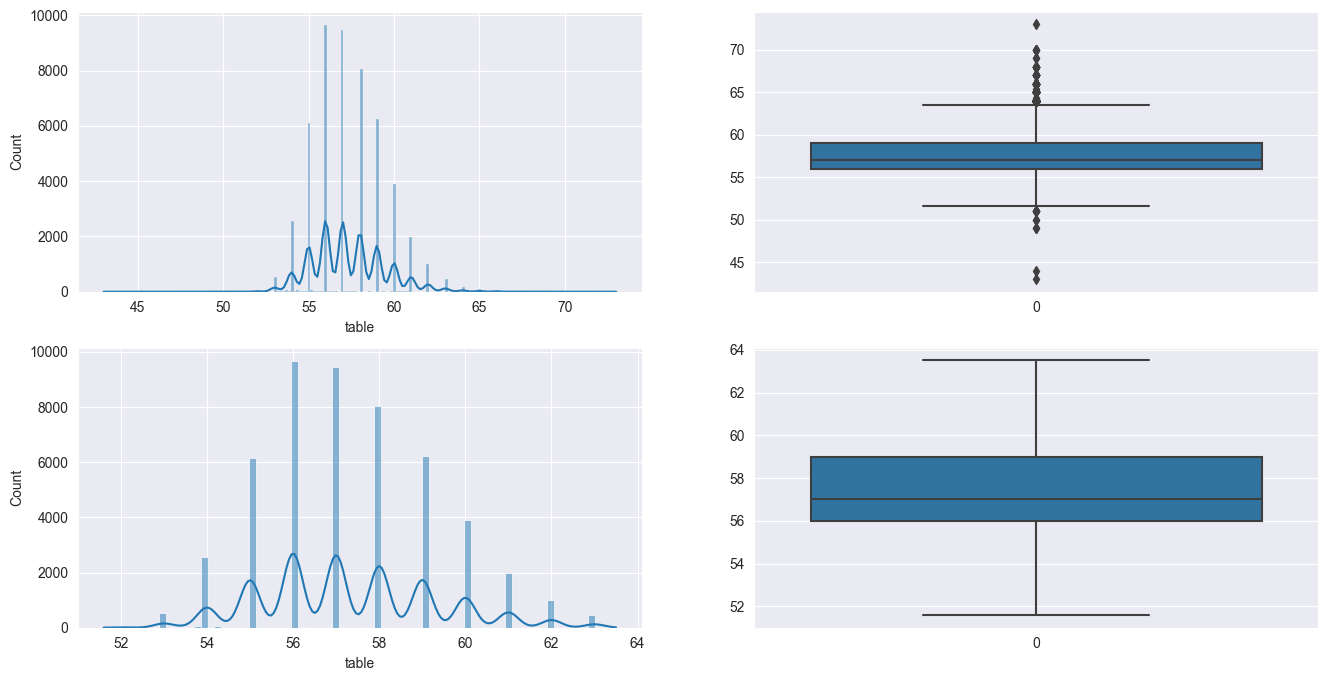

In [110]:
# comparison before and after outlier removal
plt.figure(figsize = (16, 8))
plt.subplot(2, 2, 1)
sns.histplot(diamonds['table'], kde = True)

plt.subplot(2, 2, 2)
sns.boxplot(data = diamonds['table'])

plt.subplot(2, 2, 3)
sns.histplot(diamonds_clean['table'], kde = True)

plt.subplot(2, 2, 4)
sns.boxplot(data = diamonds_clean['table'])

plt.show()

In [111]:
# the comparison plot after looks much better! Let's assign it to the original diamonds data
diamonds = diamonds[(diamonds['table'] >= lower_limit_table) & (diamonds['table'] <= upper_limit_table)]
diamonds.shape

(50842, 10)

### Dealing with 'carat' outliers

<AxesSubplot: >

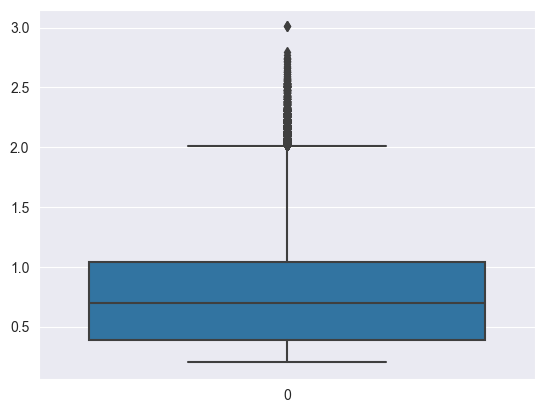

In [112]:
# visualizing outliers with boxplot
sns.boxplot(data = diamonds['carat'])

In [113]:
# calculating quartile range and IQR
Q1_carat = diamonds['carat'].quantile(0.25)
Q3_carat = diamonds['carat'].quantile(0.75)
IQR_carat = Q3_carat - Q1_carat

# calculating upper and lower limit
lower_limit_carat = Q1_carat - 1.5 * IQR_carat
upper_limit_carat = Q3_carat + 1.5 * IQR_carat
print(f'Lower limit is: {lower_limit_carat}')
print(f'Upper limit is: {upper_limit_carat}')

# filtering to see the outliers
# diamonds[diamonds['carat'] > upper_limit_carat]

# how many outliers?
# double quotes are needed to avoid syntax error
print(f"Number of outliers in the upper limit: {diamonds[diamonds['carat'] > upper_limit_carat].count()}")
print(f"Number of outliers in the lower limit: {diamonds[diamonds['carat'] < lower_limit_carat].count()}")

Lower limit is: -0.5850000000000001
Upper limit is: 2.015
Number of outliers in the upper limit: carat      1275
cut        1275
color      1275
clarity    1275
depth      1275
table      1275
price      1275
x          1275
y          1275
z          1275
dtype: int64
Number of outliers in the lower limit: carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [114]:
# shape before outlier removal
print(f'Data before removing outliers: {diamonds.shape}')

# removing outliers
diamonds_clean = diamonds[(diamonds['carat'] >= lower_limit_carat) & (diamonds['carat'] <= upper_limit_carat)]

# shape after outlier removal
print(f'Data after removing outliers: {diamonds_clean.shape}')

Data before removing outliers: (50842, 10)
Data after removing outliers: (49567, 10)


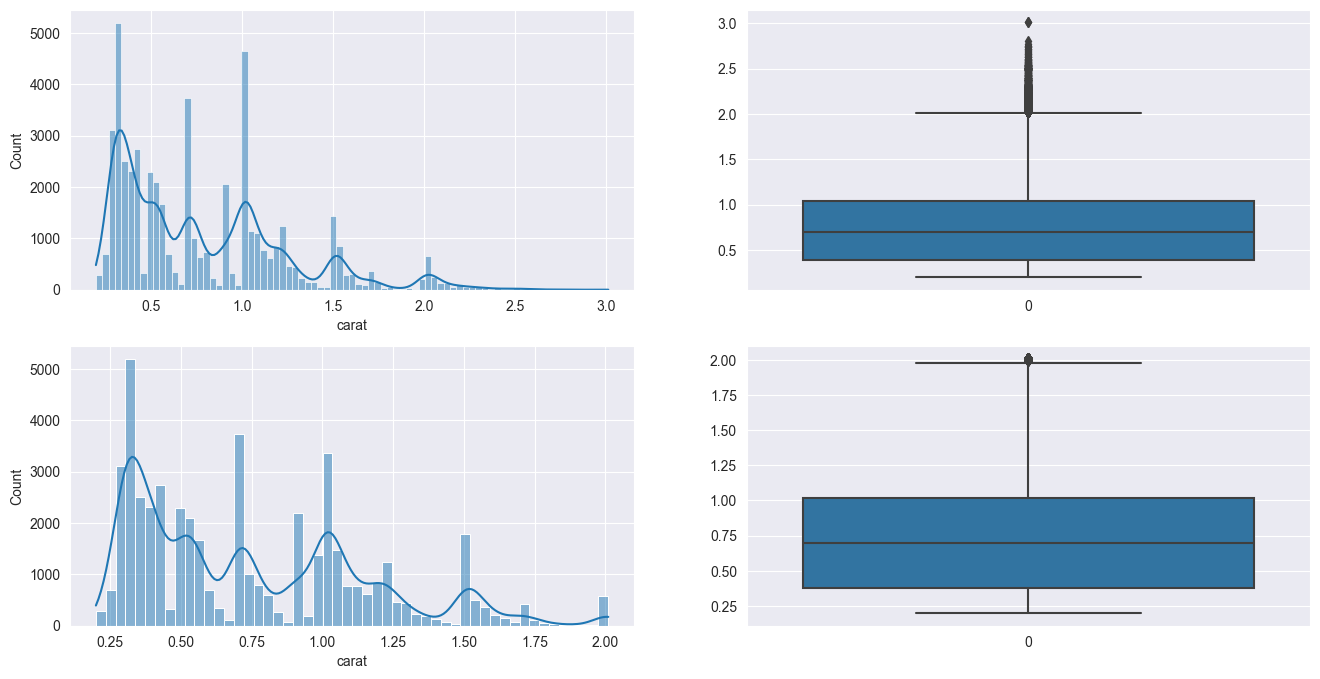

In [115]:
# comparison before and after outlier removal
plt.figure(figsize = (16, 8))
plt.subplot(2, 2, 1)
sns.histplot(diamonds['carat'], kde = True)

plt.subplot(2, 2, 2)
sns.boxplot(data = diamonds['carat'])

plt.subplot(2, 2, 3)
sns.histplot(diamonds_clean['carat'], kde = True)

plt.subplot(2, 2, 4)
sns.boxplot(data = diamonds_clean['carat'])

plt.show()

In [116]:
# the comparison plot after looks much better! Let's assign it to the original diamonds data
diamonds = diamonds[(diamonds['carat'] >= lower_limit_carat) & (diamonds['carat'] <= upper_limit_carat)]
diamonds.shape

(49567, 10)

# 3. Plotting and Correlation
Until now, we have explored and cleaned up the data. In this section, we'll re-plot with clean data and calculate correlations.

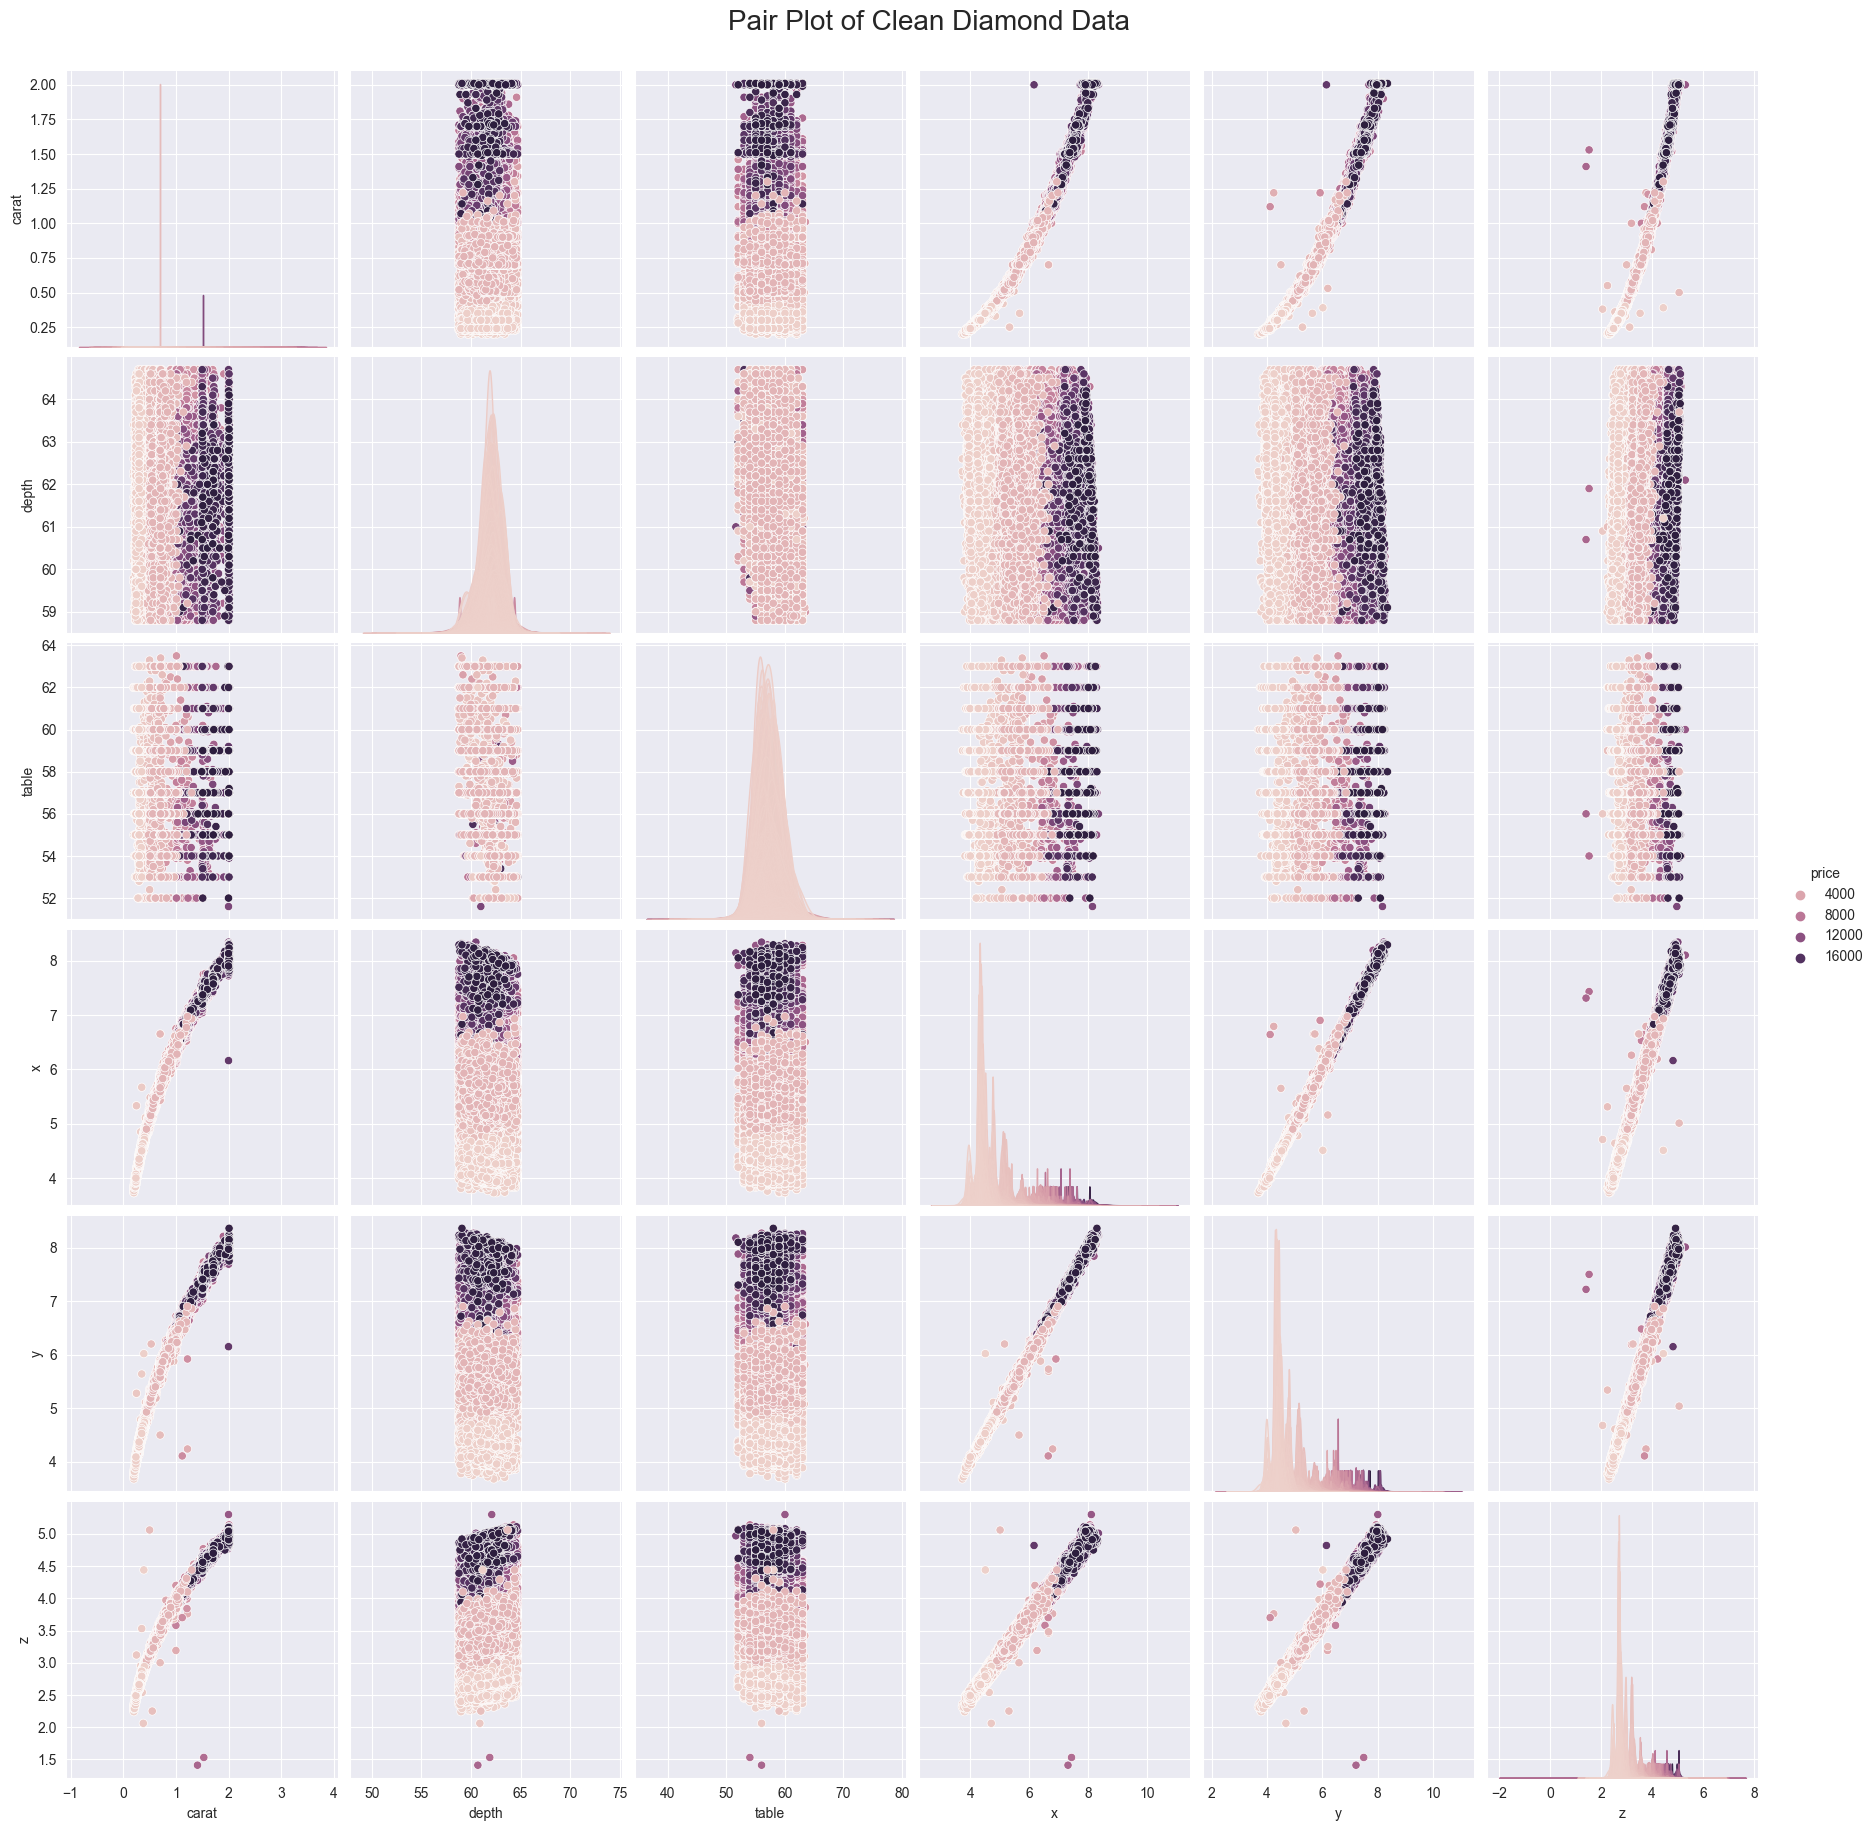

In [117]:
sns.set_style("darkgrid")
# Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE).
# KDE - distribution of observations in a dataset, analogous to a histogram. 
# KDE represents the data using a continuous probability density curve in one or more dimensions.
plot = sns.pairplot(diamonds, hue = "price", height = 3)
plot.fig.suptitle('Pair Plot of Clean Diamond Data', size = 20, y = 1.02) # y = controls title height placement
plt.show() 

<AxesSubplot: >

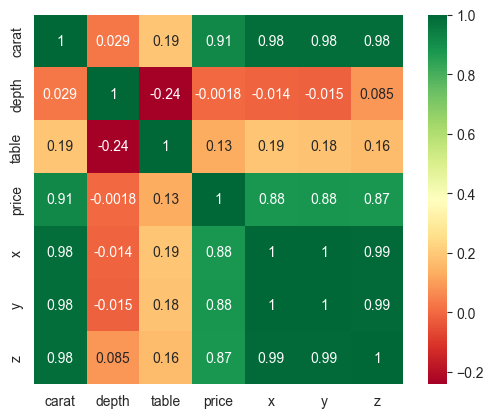

In [118]:
# correleation heatmap with all numerical data
# annot=True => shows corr numbers inside squares
sns.heatmap(diamonds.corr(numeric_only = True), square = True, cmap = 'RdYlGn', annot = True)
# green - positive correlation; red - negative correlation

**Observations:**
1. In the pairplot, we see linear and curvilinear relationships. 'table' and 'depth' features have overlapping cluster-like shapes. Overall, the graphs look much cleaner than before outlier removal. Higher values correspond to higher prices and this trend is now clearly seen.
2. In correlation heatmap, 'table' and 'depth' have the lowest correlations with other features. Overall, correlation is high and seems promising.

# 4. Encoding
In EDA, we have seen that some of the columns in our data are categorical (strings). To use that data, we need to encode it to numbers.

Two common ways to do this (from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder):
* **OneHotEncoder** for unordered (nominal) data. Has no natural order, for example, ['circle', 'oval', 'square']. Encoder works alphabetically from left to right.
* **OrdinalEncoder** for ordered (ordinal) data. This data has a natural order, for example, ['first', 'second', 'third], ['S', 'M', 'L', 'XL'].

Another option is to use simple Ordinal Encoding. Since the object columns of our data are ordinal (cut, color, clarity), i.e. have a natural ordering, we can use simple Ordinal Encoding.

More information about encoding techniques can be found here: https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f
More information about OneHotEncoder and OrdinalEncoder can be found here: https://www.youtube.com/watch?v=0w78CHM_ubM

In [119]:
# print the unique values and their counts before encoding
diamonds['cut'].value_counts()

Ideal        21063
Premium      12785
Very Good    11485
Good          3895
Fair           339
Name: cut, dtype: int64

In [120]:
# Remember that the order is: Fair, Good, Very Good, Premium, Ideal
# specify the order of the categories
cut_en = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

# perform inplace ordinal encoding
diamonds['cut'].replace(cut_en, inplace = True)

# check if encoding worked correctly
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [121]:
# print the unique values before encoding
print(sorted(diamonds['color'].unique()))

['D', 'E', 'F', 'G', 'H', 'I', 'J']


In [122]:
# Remember that the order is: J (worst) to D (best)
# specify the order of the categories
color_en = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}

# perform inplace ordinal encoding
diamonds['color'].replace(color_en, inplace = True)

# check if encoding worked correctly
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [123]:
# print the unique values and their counts before encoding
diamonds['clarity'].value_counts()

SI1     11985
VS2     11534
VS1      7751
SI2      7631
VVS2     4882
VVS1     3566
IF       1741
I1        477
Name: clarity, dtype: int64

In [124]:
# Remember that the order is: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
# specify the order of the categories
color_en = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# perform inplace ordinal encoding
diamonds['clarity'].replace(color_en, inplace = True)

# check if encoding worked correctly
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


# 5. Multivariate Regression with all features

In [125]:
# creating feature and target arrays
X = diamonds.drop('price', axis = 1).values  # features
y = diamonds['price'].values  # target

In [126]:
# splitting data into testing and training sets
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1, random_state = 77)

# assigning the regressor and fitting data
lr = LinearRegression()
lr.fit(X_train, y_train) # Training

LinearRegression()

In [127]:
# predicting on the test set
y_pred = lr.predict(X_test) 

# calculate and print R^2 and RMSE
print(f"R^2: {lr.score(X_test, y_test)}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

R^2: 0.9113608277397205
Root Mean Squared Error: 1064.4338335991758


In [128]:
# Creating a comparison table
results = pd.DataFrame({'Actual' :y_test, 'Predicted': y_pred}) 
# only display first 5 results
results.head() 

,Actual,Predicted
0,4588,3946.601086
1,1052,2107.063687
2,2671,2688.732868
3,4574,5864.918868
4,485,-1499.197824


In [129]:
# testing test_size impact on accuracy score

# test sizes to be tested
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for test_size in test_sizes:
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 77)
    
    # fit a linear regression model on the training data
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # predictions on test data
    y_pred = lr.predict(X_test)
    
    # calculate the accuracy of the model
    r2 = r2_score(y_test, y_pred)
    print(f"Test size: {test_size}, R^2 score: {r2}")

Test size: 0.1, R^2 score: 0.9113608277397205
Test size: 0.2, R^2 score: 0.9078670819901965
Test size: 0.3, R^2 score: 0.9098674174709462
Test size: 0.4, R^2 score: 0.9102723319129528
Test size: 0.5, R^2 score: 0.9105232624959944
Test size: 0.6, R^2 score: 0.9108714066683635
Test size: 0.7, R^2 score: 0.9090329135465918
Test size: 0.8, R^2 score: 0.9076671769572249
Test size: 0.9, R^2 score: 0.9080811088531541


**Observations:**

Optimal test size is 10%. Given this test size, Linear Regression model has reached 91.14% R^2 value, i.e. the model explains ~91% of the variance in the dependent variable. The model also achieved RMSE of 1064.43$, which means that the model's predictions for the target variable differ from the actual values by 1064.43$.

**Cheatsheet:**

**RMSE (Root Mean Square Error)** is calculated between actual and predicted values. It ranges from 0 to infinity, on the same scale as our target (in our case, the target is in USD, so RMSE value is also in USD). As such, there's no strict guidelines or ranges for RMSE interpretation. RMSE value can only be interpretted for that specific dataset. Still, **the closer the value is to 0, the better the model is performing.**

In simple terms, the RMSE formula is: RMSE = sqrt( (sum(actual - predicted)^2) / observations, n)

For accuracy comparisons between different models, RMSE is a better choice than R^2.

More about RMSE: https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

**R^2 (Coefficient of Determination)** is the proportion of the variance in the dependent variable that can be explained by the independent variables in a regression model. The caveat is that R^2 tends to increase with the number of independent variables. For multi-linear models, it is better to use adjusted R^2.

More about R^2: https://medium.com/mlearning-ai/dont-misuse-r-squared-r%C2%B2-value-6beecf123ce9

# 6. Multivariate Regression with highly correlated features
In correlation heatmap we have seen that 'table' and 'depth' had poor correlation with all other features. In this section we will exclude those columns.

In [130]:
# lets again look at the dataframe
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


In [131]:
# creating feature and target arrays
# X = diamonds.drop('price', axis = 1).values  # features
X = diamonds[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']].values # features
y = diamonds['price'].values  # target

In [132]:
# splitting data into testing and training sets
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1, random_state = 77)

# assigning the regressor and fitting data
lr = LinearRegression()
lr.fit(X_train, y_train) # Training

LinearRegression()

In [133]:
# predicting on the test set
y_pred = lr.predict(X_test) 

# calculate and print R^2 and RMSE
print(f"R^2: {lr.score(X_test, y_test)}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

R^2: 0.9118775428497192
Root Mean Squared Error: 1061.3267820841


In [134]:
# testing test_size impact on accuracy score

# test sizes to be tested
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for test_size in test_sizes:
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 77)
    
    # fit a linear regression model on the training data
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # predictions on test data
    y_pred = lr.predict(X_test)
    
    # calculate the accuracy of the model
    r2 = r2_score(y_test, y_pred)
    print(f"Test size: {test_size}, R^2 score: {r2}")

Test size: 0.1, R^2 score: 0.9118775428497192
Test size: 0.2, R^2 score: 0.9100248894868974
Test size: 0.3, R^2 score: 0.910730336786383
Test size: 0.4, R^2 score: 0.9107353927807054
Test size: 0.5, R^2 score: 0.9108352419128384
Test size: 0.6, R^2 score: 0.910947477427166
Test size: 0.7, R^2 score: 0.910537638055135
Test size: 0.8, R^2 score: 0.9104665107780647
Test size: 0.9, R^2 score: 0.9105934580990263


**Observations:**

Optimal test size for this model with highly correlated features is 10%. The R^2 values are close to each other (~91%), with very minimal differences. This suggests that the model is not overfitting or underfitting the data and is able to give good predictions for unseen data. RMSE decreases by 3.1$ from 1064.43$ to 1061.33$. R^2 value also increased slightly, from 91.14% to 91.19%. Thus, the model with highly correlated features performed better than the model with all features.


# 7. Forward Feature Selection
Forward Feature Selection is a technique for optimizing machine learning models. Its goal is to find the best possible combination of features that can help the model achieve the highest possible performance. In this process, the algorithm starts with no features and incrementally adds the best-performing features, one at a time, based on the specified scoring criteria, such as R^2. 

By specifying a range of k_features from 1 to n, where n is the total number of features, the SequentialFeaturesSelector algorithm evaluates all possible feature combinations and selects the one that yields the highest R^2 score (in our case). This process helps to reduce the dimensionality of the dataset and improve the model's generalization performance, making it more robust to new data.

Feature Selection is best used when the number of features is high. In this case, we have 9 features, which sharply increases the chance that all those features will be selected as the best. **Feature selection in this chapter is for showcasing purposes only.**

Code adapted from: https://www.youtube.com/watch?v=POCvLGRLDzM

In [135]:
# Define the feature matrix and target variable
X = diamonds.drop('price', axis = 1).values  # features
y = diamonds['price'].values  # target

# splitting the data into train and test, so we save computation power and run time
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 77)

# we have 5 feature columns
print(f'X_train shape: {X_train.shape}')

X_train shape: (39653, 9)


In [136]:
lr = LinearRegression()

In [137]:
# Create a sequential forward feature selector
# verbose=2 shows the output of parallel jobs when we fit to sfs
sfs = SequentialFeatureSelector(lr, k_features = (1, 9), forward = True, scoring = 'r2', verbose = 2).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-04-24 14:34:05] Features: 1/9 -- score: 0.8349581014612573[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-04-24 14:34:05] Features: 2/9 -- score: 0.8778481827209237[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2023-04-24 14:34:05] Features: 3/9 -- score: 0.8984485754181515[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [138]:
# Print the selected features and their indices
print('Selected features:', sfs.k_feature_names_)
print('Selected feature indices:', sfs.k_feature_idx_)

Selected features: ('0', '1', '2', '3', '4', '5', '6', '7', '8')
Selected feature indices: (0, 1, 2, 3, 4, 5, 6, 7, 8)


In [139]:
# select column indexes of best features
col_index = sfs.k_feature_idx_

# Loop over each index position in the list and get their column names
best_features = []
for i in col_index:
    best_features.append(diamonds.columns[i])

print(best_features) # prints column names according to col index aka ['col2', 'col4', 'col5', etc]

# print the number of items in the list
print(f'Number of best features: {len(best_features)}')

# if best features contains our target, remove it and print the features
# Warning! If we don't check and remove the target, the R^2 will automatically be 1.0, which is false!
best_features.remove('price')
print(best_features)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y']
Number of best features: 9
['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y']


In [140]:
sfs.k_score_

0.9112437005898684

In [141]:
# converting to pd
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.8360071260227614, 0.8346344559436275, 0.834...",0.834958,"(0,)",0.001231,0.000958,0.000479
2,"(0, 3)","[0.8775568934687983, 0.8784091965091129, 0.880...",0.877848,"(0, 3)",0.002317,0.001803,0.000901
3,"(0, 2, 3)","[0.89840542588705, 0.8986690544392582, 0.89935...",0.898449,"(0, 2, 3)",0.001418,0.001103,0.000552
4,"(0, 2, 3, 8)","[0.9094578190153152, 0.9092000446214414, 0.908...",0.908979,"(0, 2, 3, 8)",0.000892,0.000694,0.000347
5,"(0, 2, 3, 5, 8)","[0.910758592015322, 0.9106488850291823, 0.9097...",0.91043,"(0, 2, 3, 5, 8)",0.000876,0.000681,0.000341
6,"(0, 2, 3, 5, 6, 8)","[0.9108840891898, 0.9111375915161842, 0.910116...",0.910742,"(0, 2, 3, 5, 6, 8)",0.000919,0.000715,0.000358
7,"(0, 2, 3, 5, 6, 7, 8)","[0.9111370425155264, 0.9113695282677878, 0.910...",0.910999,"(0, 2, 3, 5, 6, 7, 8)",0.000893,0.000695,0.000347
8,"(0, 1, 2, 3, 5, 6, 7, 8)","[0.9112022022305654, 0.9116148736082146, 0.910...",0.911234,"(0, 1, 2, 3, 5, 6, 7, 8)",0.000878,0.000683,0.000341
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)","[0.9114985965893504, 0.9115173432538598, 0.910...",0.911244,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.001098,0.000854,0.000427


**Observation:**

Forward Feature Selection, given a test size of 20%, has identified 9 best features ('carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y'), which should give R^2 of ~91.12%. Note that adjusting the test size of feature selection gives slightly different results and that the result table contains our target 'price' in the calculations.

# 8. Multivariate Linear Regression with best selected features

In [142]:
# Defining X with best selected features and our target Y
X = diamonds[best_features]
y = diamonds['price']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1, random_state = 77)

# defining the regressor and fitting training data
lr = LinearRegression().fit(X_train, y_train)

In [143]:
# Testing on previously unseen data
y_pred = lr.predict(X_test)
# Comparison table creation
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

# printing R^2 value
print(f'R^2 score after feature selection: {r2_score(y_test, y_pred)}')
print(f"Root Mean Squared Error: {rmse}")

       Actual    Predicted
9409     4588  3950.215704
38907    1052  2109.019620
53432    2671  2690.104087
9307     4574  5806.374590
37929     485 -1509.490904
R^2 score after feature selection: 0.9124838952825344
Root Mean Squared Error: 1061.3267820841


In [144]:
# testing test_size impact on accuracy score

# test sizes to be tested
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for test_size in test_sizes:
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 77)
    
    # fit a linear regression model on the training data
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # predictions on test data
    y_pred = lr.predict(X_test)
    
    # calculate the accuracy of the model
    r2 = r2_score(y_test, y_pred)
    print(f"Test size: {test_size}, R^2 score: {r2}")

Test size: 0.1, R^2 score: 0.9124838952825344
Test size: 0.2, R^2 score: 0.9101807706566692
Test size: 0.3, R^2 score: 0.9108144198251815
Test size: 0.4, R^2 score: 0.9108060963832665
Test size: 0.5, R^2 score: 0.91089412851508
Test size: 0.6, R^2 score: 0.9110048003043315
Test size: 0.7, R^2 score: 0.9106530876464289
Test size: 0.8, R^2 score: 0.9105891205872568
Test size: 0.9, R^2 score: 0.9106574026373787


**Observations:**

Regression with selected features, with optimal test size of 10%, has resulted in the highest R^2 score and same RMSE as regression with correlated features.

# 9. Conclusion

Multivariate linear regression with all features performed the worst and achieved R^2 score of 91.14% with RMSE of 1064.43 dollars. Model with selected features performed the best and had a slighty better R^2 value than the model with highly correlated features (91.25% vs 91.19%, respectfuly). Both of those models had the same RMSE of 1061.33$. 

The model could be used to quickly estimate diamond prices. However, the predicted diamond price shouldn't be taken at face value and the error of ~1061 dollars should be kept in mind.

In this project, the achieved values are:
* With all features -> with highest correlated features -> with selected best features
* R^2: 91.14%     ->  91.19% ->   91.25%
* RMSE: 1064.43$  -> 1061.33$ -> 1061.33$
